In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\verma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


EDA

In [5]:
df.drop("Cabin",axis=1,inplace=True)

In [6]:
amean=df["Age"].mean()
df["Age"].fillna(amean,inplace=True)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

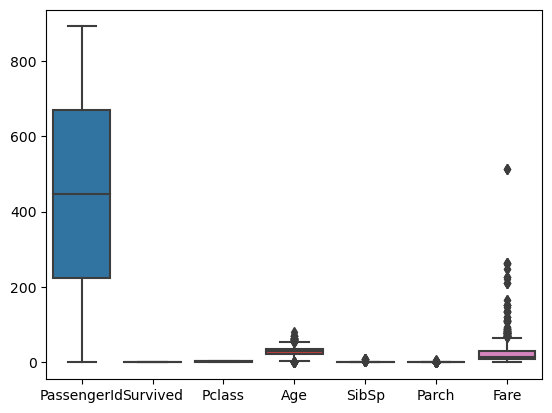

In [8]:
sns.boxplot(data = df)

In [9]:
df.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
from sklearn.preprocessing import OrdinalEncoder as oe

In [12]:
df[["Sex"]]=oe().fit_transform(df[["Sex"]])
df[["Embarked"]]=oe().fit_transform(df[["Embarked"]])

In [13]:
df.dropna(inplace = True)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.000000,1,0,7.2500,2.0
1,1,1,0.0,38.000000,1,0,71.2833,0.0
2,1,3,0.0,26.000000,0,0,7.9250,2.0
3,1,1,0.0,35.000000,1,0,53.1000,2.0
4,0,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,13.0000,2.0
887,1,1,0.0,19.000000,0,0,30.0000,2.0
888,0,3,0.0,29.699118,1,2,23.4500,2.0
889,1,1,1.0,26.000000,0,0,30.0000,0.0


SPLITTING THE DATA

In [15]:
target=df["Survived"]
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [16]:
features=df.iloc[:,1:]
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.000000,1,0,7.2500,2.0
1,1,0.0,38.000000,1,0,71.2833,0.0
2,3,0.0,26.000000,0,0,7.9250,2.0
3,1,0.0,35.000000,1,0,53.1000,2.0
4,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.000000,0,0,13.0000,2.0
887,1,0.0,19.000000,0,0,30.0000,2.0
888,3,0.0,29.699118,1,2,23.4500,2.0
889,1,1.0,26.000000,0,0,30.0000,0.0


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size=0.30,random_state=1)

In [18]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
115,3,1.0,21.000000,0,0,7.9250,2.0
874,2,0.0,28.000000,1,0,24.0000,0.0
77,3,1.0,29.699118,0,0,8.0500,2.0
876,3,1.0,20.000000,0,0,9.8458,2.0
682,3,1.0,20.000000,0,0,9.2250,2.0
...,...,...,...,...,...,...,...
716,1,0.0,38.000000,0,0,227.5250,0.0
768,3,1.0,29.699118,1,0,24.1500,1.0
73,3,1.0,26.000000,1,0,14.4542,0.0
236,2,1.0,44.000000,1,0,26.0000,2.0


#APPLYING MODEL

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [21]:
predict = lr.predict(xtest)

CONFUSION MATRIX

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
pd.DataFrame(confusion_matrix(ytest,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,144,22
Actual Yes,22,79


CLASSIFICATION REPORT

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       166
           1       0.78      0.78      0.78       101

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267

